In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Ayarlar
labels = ['glioma', 'meningioma', 'pituitary', 'notumor']
image_size = 256
X, Y = [], []

In [3]:
# Veri yükleme
print("Veri yükleme işlemi başlatıldı...")
for folder_type in ['Training', 'Testing']:
    for label in labels:
        folder_path = os.path.join('dataset', 'btd-mri', folder_type, label)
        if os.path.exists(folder_path):
            print(f"{folder_type} için {label} sınıfı yükleniyor...")
            for image_name in tqdm(os.listdir(folder_path), desc=f'Loading {folder_type} {label}'):
                img_path = os.path.join(folder_path, image_name)
                img = cv2.imread(img_path)
                if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
                    img = cv2.resize(img, (image_size, image_size))
                    X.append(img)
                    Y.append(label)

# Ek veri yükleme (notumor sınıfı)
no_folder_path = os.path.join('dataset', 'btd', 'no')
if os.path.exists(no_folder_path):
    print("BTD 'notumor' sınıfı yükleniyor...")
    for image_name in tqdm(os.listdir(no_folder_path), desc='Loading BTD no class'):
        img_path = os.path.join(no_folder_path, image_name)
        img = cv2.imread(img_path)
        if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append('notumor')

print(f"Toplam {len(X)} görüntü ve etiket yüklendi.")

Veri yükleme işlemi başlatıldı...
Training için glioma sınıfı yükleniyor...


Loading Training glioma: 100%|██████████| 1321/1321 [00:08<00:00, 152.45it/s]


Training için meningioma sınıfı yükleniyor...


Loading Training meningioma: 100%|██████████| 1339/1339 [00:10<00:00, 133.83it/s]


Training için pituitary sınıfı yükleniyor...


Loading Training pituitary: 100%|██████████| 1457/1457 [00:12<00:00, 115.32it/s]


Training için notumor sınıfı yükleniyor...


Loading Training notumor: 100%|██████████| 1595/1595 [00:10<00:00, 153.14it/s]


Testing için glioma sınıfı yükleniyor...


Loading Testing glioma: 100%|██████████| 300/300 [00:02<00:00, 105.74it/s]


Testing için meningioma sınıfı yükleniyor...


Loading Testing meningioma: 100%|██████████| 306/306 [00:02<00:00, 108.63it/s]


Testing için pituitary sınıfı yükleniyor...


Loading Testing pituitary: 100%|██████████| 300/300 [00:03<00:00, 99.87it/s] 


Testing için notumor sınıfı yükleniyor...


Loading Testing notumor: 100%|██████████| 405/405 [00:03<00:00, 105.23it/s]


BTD 'notumor' sınıfı yükleniyor...


Loading BTD no class: 100%|██████████| 98/98 [00:00<00:00, 120.41it/s]

Toplam 7121 görüntü ve etiket yüklendi.


In [4]:
# Boş veya bozuk görüntülerin kontrolü
valid_images = []
valid_labels = []
for i, img in enumerate(X):
    if img is not None and np.max(img) > 0:  # Maksimum piksel değeri sıfırdan büyük olmalı
        valid_images.append(img)
        valid_labels.append(Y[i])
X, Y = valid_images, valid_labels
print(f"Geçerli görüntü sayısı: {len(X)}")

Geçerli görüntü sayısı: 7121


Sınıflardan örnek görseller gösteriliyor...


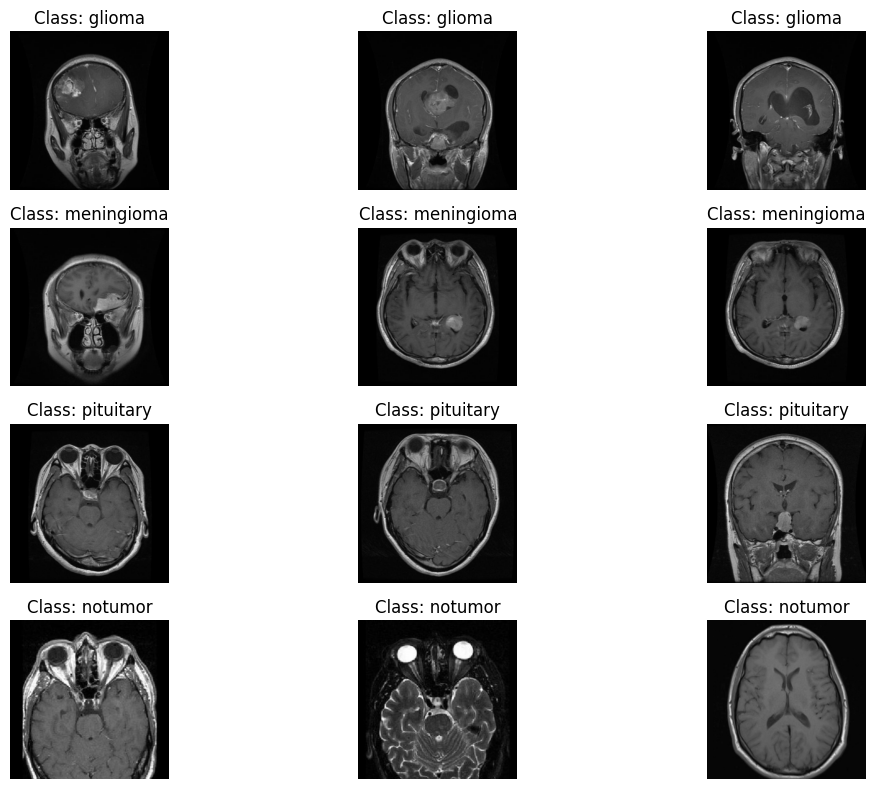

In [9]:
# Sınıflardan örnek görsellerin gösterimi
print("Sınıflardan örnek görseller gösteriliyor...")
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    sample_indices = [j for j, y in enumerate(Y) if y == label][:3]
    for k, idx in enumerate(sample_indices):
        plt.subplot(len(labels), 3, i * 3 + k + 1)
        plt.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB)) 
        plt.title(f"Class: {label}")
        plt.axis('off')
plt.tight_layout()
plt.show()

Normalizasyon öncesi piksel dağılımı görselleştiriliyor...


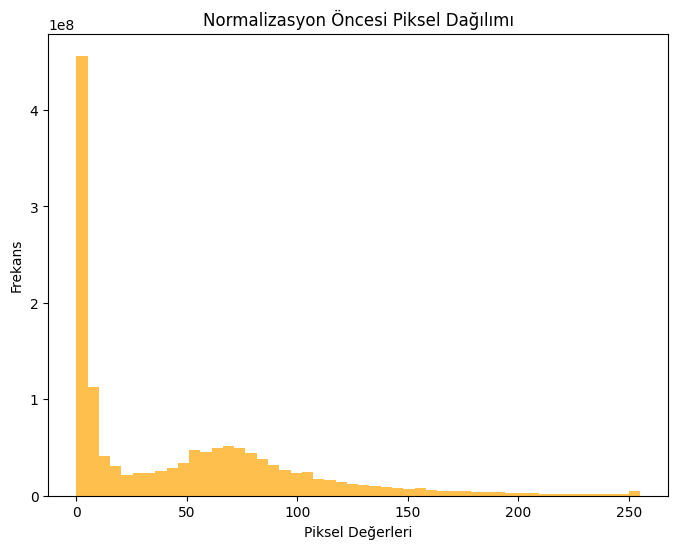

In [10]:
# Normalizasyon öncesi piksel dağılımı görselleştirme
print("Normalizasyon öncesi piksel dağılımı görselleştiriliyor...")
plt.figure(figsize=(8, 6))
plt.hist(np.array(X).flatten(), bins=50, color='orange', alpha=0.7)
plt.title("Normalizasyon Öncesi Piksel Dağılımı")
plt.xlabel("Piksel Değerleri")
plt.ylabel("Frekans")
plt.show()

In [11]:
# Normalizasyon
print("Görseller normalleştiriliyor...")
X = np.array(X, dtype=np.float32) / 255.0

Görseller normalleştiriliyor...


Normalizasyon sonrası piksel dağılımı görselleştiriliyor...


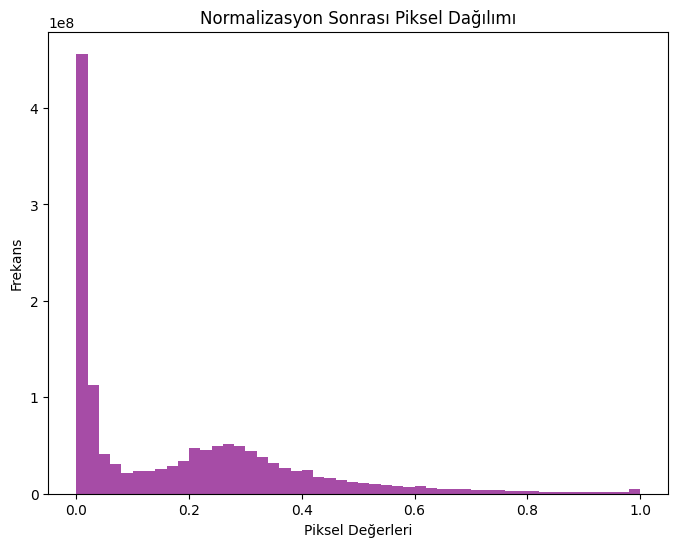

In [12]:
# Normalizasyon sonrası piksel dağılımı görselleştirme
print("Normalizasyon sonrası piksel dağılımı görselleştiriliyor...")
plt.figure(figsize=(8, 6))
plt.hist(X.flatten(), bins=50, color='purple', alpha=0.7)
plt.title("Normalizasyon Sonrası Piksel Dağılımı")
plt.xlabel("Piksel Değerleri")
plt.ylabel("Frekans")
plt.show()

In [13]:
# Etiketleri sayısal değerlere dönüştürme
print("Etiketler sayısal değerlere dönüştürülüyor...")
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

Etiketler sayısal değerlere dönüştürülüyor...


Sınıf dağılımı görselleştiriliyor...


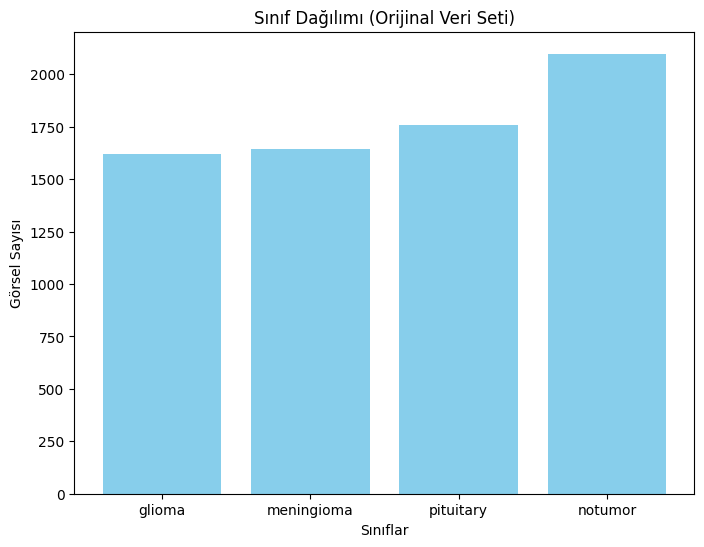

In [17]:
# Sınıf dağılımını görselleştirme
print("Sınıf dağılımı görselleştiriliyor...")
class_counts = Counter(Y)
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Sınıf Dağılımı (Orijinal Veri Seti)")
plt.xlabel("Sınıflar")
plt.ylabel("Görsel Sayısı")
plt.show()

In [18]:
# Verilerin kaydedilmesi
print("İşlenmiş veriler kaydediliyor...")
output_dir = 'dataset/processed_data'
os.makedirs(output_dir, exist_ok=True)
np.save(os.path.join(output_dir, 'X_processed.npy'), X)
np.save(os.path.join(output_dir, 'Y_encoded.npy'), Y_encoded)

print(f"İşlenmiş veri seti '{output_dir}' dizinine başarıyla kaydedildi.")

İşlenmiş veriler kaydediliyor...
İşlenmiş veri seti 'dataset/processed_data' dizinine başarıyla kaydedildi.
